# Import Libraries

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale images

In [19]:
img1 = cv2.imread('Differences.png', cv2.IMREAD_GRAYSCALE)         
img2 = cv2.imread('Differences2.png', cv2.IMREAD_GRAYSCALE)     

In [20]:
# Make sure both images have the same size
if img1.shape != img2.shape:
         img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Method 1

In [21]:
# Create an RGB image where:
# - Red channel is img1
# - Green channel is img2
# - Blue channel is zeros
blue_channel = np.zeros_like(img1)

In [22]:
# Stack the channels
color_diff = cv2.merge([blue_channel, img2, img1])

In [23]:
# Convert to RGB for displaying with matplotlib (OpenCV uses BGR)
color_diff_rgb = cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB)

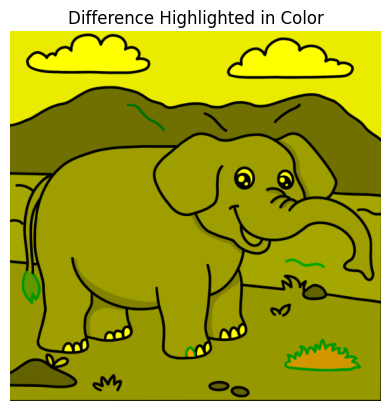

In [24]:
# Show the result
plt.imshow(color_diff_rgb)
plt.title('Difference Highlighted in Color')
plt.axis('off')
plt.show()

# Method 2

In [25]:
# Create an empty RGB image
color_diff = np.zeros_like(color_diff, dtype=np.uint8)

In [26]:
# Where images are equal → keep grayscale
mask_equal = img1 == img2
color_diff[mask_equal] = img1[mask_equal].flatten().reshape(-1, 1)

In [27]:
# Where img1 > img2 → red
mask_red = img1 > img2
color_diff[mask_red] = [255, 0, 0]

# Where img2 > img1 → blue
mask_blue = img2 > img1
color_diff[mask_blue] = [0, 0, 255]

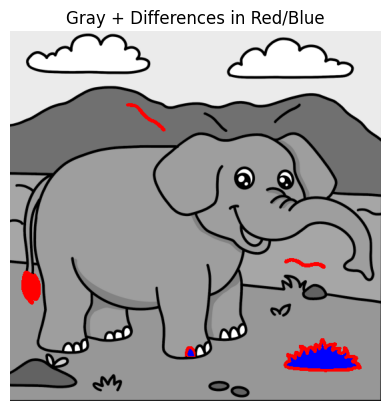

In [28]:
# Show result
plt.imshow(cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB))
plt.title("Gray + Differences in Red/Blue")
plt.axis('off')
plt.show()